# Análisis exploratorio de proyecciones de activos económicos según sexo y rango de edad, durante 2000-2030.

En el siguiente notebook de Jupyter estaremos explorando las proyecciones de empleados activos laboralmente en la República Dominicana, durante un período de treinta años, es decir desde el año 2000 hasta  el 2030. Para ello  se utilizaron unicamente tres librerías: numpy, matplotlib y pandas, que en combinacion sirvieron para cargar los  datos al notebook, explorar su composición, realizar calculos matemáticos sobre ellos y  realizar importantes gráficas, como se verá a continuación. 

In [94]:
#librerias utilizadas:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [97]:
#Importación del archivo de excel
datos2=pd.read_excel("dataproyecciones.xlsx")


In [75]:
#Encabezado del dataframe
datos2.head()

,sexo,grupoedad,2000,2001,2002,2003,2004,2005,2006,2007,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,Hombres,15 - 19,206009,204809,203582,202235,200803,199299,197074,194797,...,188496,187478,186458,185435,184410,184595,184781,184968,185156,185345
1,Hombres,20 - 24,316507,320900,325121,330188,333813,336870,340660,344433,...,372238,373163,374076,374975,375861,373986,372105,370216,368319,366412
2,Hombres,25 - 29,313046,317535,321790,326159,329941,333362,337703,341847,...,396376,396972,397549,398105,398639,399975,401280,402565,403825,405063
3,Hombres,30 - 34,285393,288949,292298,295665,298667,301396,305524,309411,...,374030,378091,382162,386236,390326,391180,392016,392831,393622,394386
4,Hombres,35 - 39,256920,260187,263341,266460,269390,272153,275496,278680,...,339821,345059,350308,355567,360842,364947,369057,373175,377297,381438


In [98]:
#Resumen del conjunto de datos:
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sexo       28 non-null     object
 1   grupoedad  28 non-null     object
 2   2000       28 non-null     int64 
 3   2001       28 non-null     int64 
 4   2002       28 non-null     int64 
 5   2003       28 non-null     int64 
 6   2004       28 non-null     int64 
 7   2005       28 non-null     int64 
 8   2006       28 non-null     int64 
 9   2007       28 non-null     int64 
 10  2008       28 non-null     int64 
 11  2009       28 non-null     int64 
 12  2010       28 non-null     int64 
 13  2011       28 non-null     int64 
 14  2012       28 non-null     int64 
 15  2013       28 non-null     int64 
 16  2014       28 non-null     int64 
 17  2015       28 non-null     int64 
 18  2016       28 non-null     int64 
 19  2017       28 non-null     int64 
 20  2018       28 non-null     int64 


In [18]:
#Resumen  del tipo de datos de las columnas del conjunto de datos:
datos2.dtypes

sexo         object
grupoedad    object
2000          int64
2001          int64
2002          int64
2003          int64
2004          int64
2005          int64
2006          int64
2007          int64
2008          int64
2009          int64
2010          int64
2011          int64
2012          int64
2013          int64
2014          int64
2015          int64
2016          int64
2017          int64
2018          int64
2019          int64
2020          int64
2021          int64
2022          int64
2023          int64
2024          int64
2025          int64
2026          int64
2027          int64
2028          int64
2029          int64
2030          int64
dtype: object

In [19]:
stats=datos2.describe()
print(stats)

                2000           2001           2002           2003  \
count      28.000000      28.000000      28.000000      28.000000   
mean   125605.071429  127906.535714  130190.107143  132572.000000   
std    101824.081618  103168.280404  104490.870949  105959.692712   
min      1293.000000    1327.000000    1360.000000    1391.000000   
25%     29548.000000   29995.000000   30426.000000   30825.500000   
50%    117146.000000  118175.000000  118733.500000  119440.500000   
75%    208067.000000  208571.250000  209911.000000  214765.750000   
max    316507.000000  320900.000000  325121.000000  330188.000000   

                2004           2005           2006           2007  \
count      28.000000      28.000000      28.000000      28.000000   
mean   134853.250000  137084.500000  139429.000000  141758.250000   
std    107252.918158  108472.922643  109844.668901  111202.382187   
min      1422.000000    1452.000000    1477.000000    1502.000000   
25%     31183.750000   31518.0000

In [93]:
#Usando numpy vemos la posición del dato con mayor valor en una columna  del conjunto de datos
datos2["2010"].argmax()

1

In [72]:
#Para saber cuanto consume el dataset utilizado en la memoria: 
datos2.memory_usage()

Index          64
sexo          112
grupoedad     112
2000          224
2001          224
2002          224
2003          224
2004          224
2005          224
2006          224
2007          224
2008          224
2009          224
2010          224
2011          224
2012          224
2013          224
2014          224
2015          224
2016          224
2017          224
2018          224
2019          224
2020          224
2021          224
2022          224
2023          224
2024          224
2025          224
2026          224
2027          224
2028          224
2029          224
2030          224
2005_group    236
dtype: int64

In [69]:
#Tabla de frecuencia usando pandas:
bins= list(range(4,8+1,1))
datos2_2005_counts=pd.cut(datos2["2005"], bins=bins)
datos2_2005_counts=(datos2.groupby("2005_group").agg(frequency=("2005", "count")))
datos2_2005_counts["acum_frecuencia"]=datos2_2005_counts["frequency"].cumsum()
datos2_2005_counts

,frequency,acum_frecuencia
2005_group,,
"(1116.582, 68535.6]",10,10
"(68535.6, 135619.2]",5,15
"(135619.2, 202702.8]",5,20
"(202702.8, 269786.4]",4,24
"(269786.4, 336870.0]",4,28


In [67]:
#Para conocer las dimensiones del conjunto de datos, pero, lo devuelve en forma de tuplas:
datos2.shape

(28, 33)

In [78]:
#Para conocer los encabezados de las columnas del conjunto de datos
datos2.columns

Index(['sexo', 'grupoedad', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024', '2025', '2026', '2027', '2028', '2029', '2030'],
      dtype='object')

## Gráficos del conjunto de datos de Proyecciones de activos laborales:

Text(0.5, 1.0, 'República Dominicana: Proyecciones de población activa economicamente del año 2019, según observaciones')

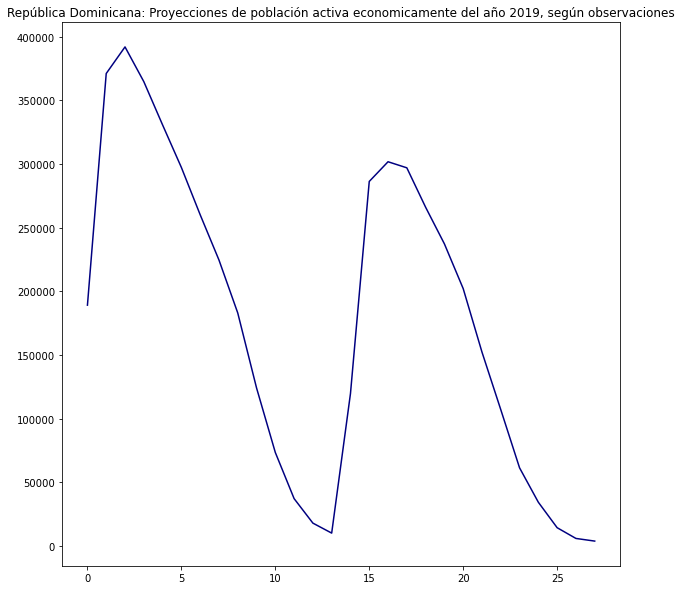

In [99]:
plt.figure(figsize=(10,10))
plt.plot(datos2["2019"], color="navy")
plt.title("República Dominicana: Proyecciones de población activa economicamente del año 2019, según observaciones")


###### Interpretación: 
Este gráfico de línea nos muestra que las estimaciones de activos en el mundo laboral durante el año 2019, donde se hace notorio que la población activa económicamente es muy amplia, pero, va en ascendencia, siendo su más alto valor la observación uno, en la que se encuentra por encima de los 350 mil personas, y va en descenso, siendo uno de sus valores por debajo de las 50 mil personas. 

Text(0.5, 1.0, 'República Dominicana: Proyecciones de activos económicos según sexo, durante el 2020')

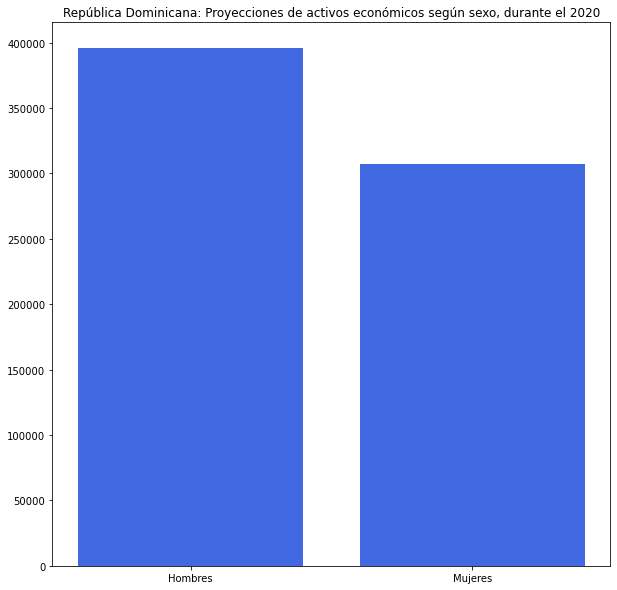

In [80]:
plt.figure(figsize=(10,10))
plt.bar(datos2["sexo"], datos2["2020"], color="royalblue")
plt.title("República Dominicana: Proyecciones de activos en la economía según sexo, durante el 2020")

###### Interpretación:

Según predicciones y estimaciones de la Oficina Nacional de Estadística, se  presume que para el año 2020, los hombres serán la población más activa economicamente hablando, debido a que ocupan una mayoría de la fuerza laboral dominicana. 

Text(0.5, 1.0, 'República Dominicana: Proyecciones de la población activa economicamente según su rango de edad, en el 2030')

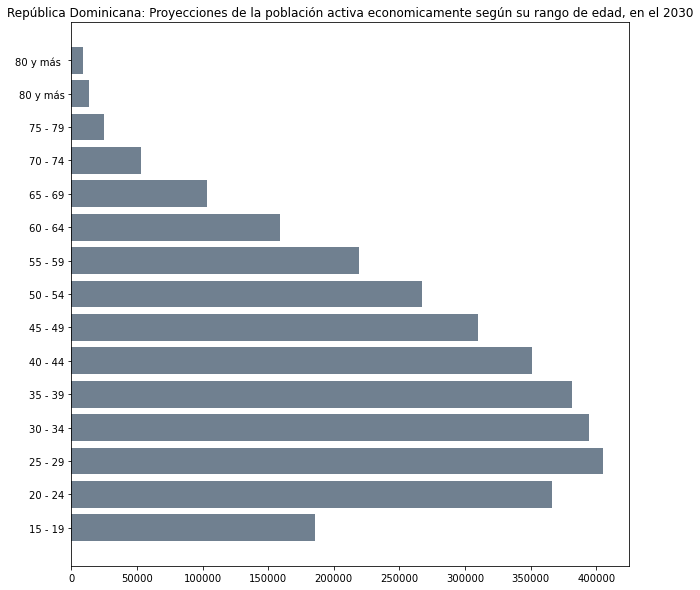

In [100]:
plt.figure(figsize=(10,10))
plt.barh(datos2["grupoedad"], datos2["2030"], color="slategrey")
plt.title("República Dominicana: Proyecciones de la población activa economicamente según su rango de edad, en el 2030")

###### Interpretación: 

Se estimó que para el año 2030,la población activa economicamente según rango iría en variación, siendo la de mayor participación aquellos cuya edad oscila entre los 25 y 29 años, y la menos participativa aquella que pase de los 60 años de edad, también se denotó que los adolescentes estarían muy involucrados en este ámbito, solo que no sería igual de alta que la de aquellos cuya edad es mayor a  los  20 años de edad.

In [81]:
y=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]

Text(0.5, 1.0, 'República  Dominicana: Proyecciones de activos en la economía en el año 2020 y el año 2030.')

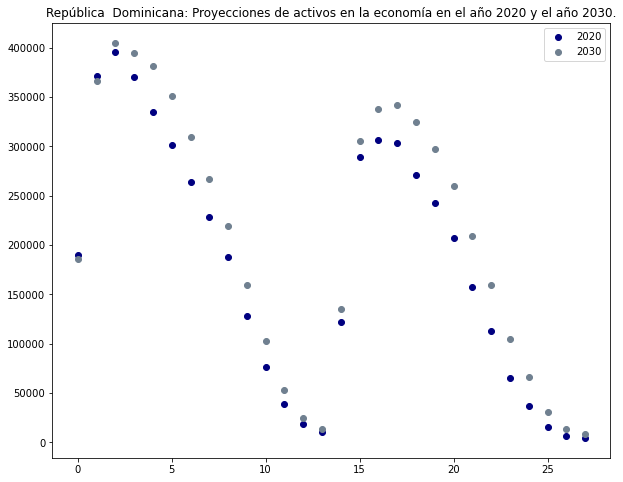

In [83]:
labels=["2020", "2030"]
plt.figure(figsize=(10,8))
plt.scatter(y, datos2["2020"], color="navy")
plt.scatter(y, datos2["2030"], color="slategrey")
plt.legend(labels)
plt.title("República  Dominicana: Proyecciones de activos en la economía en el año 2020 y el año 2030.")

###### Interpretación del gráfico:
En el anterior gráfico de dispersión o scatter, vemos que entre los años 2020  y 2030, la población activa en materia de economía, es mayor en el año 2030, que para el año 2020, y se tomo como referencia al  número de observaciones entre  0 y 27.

<StemContainer object of 3 artists>

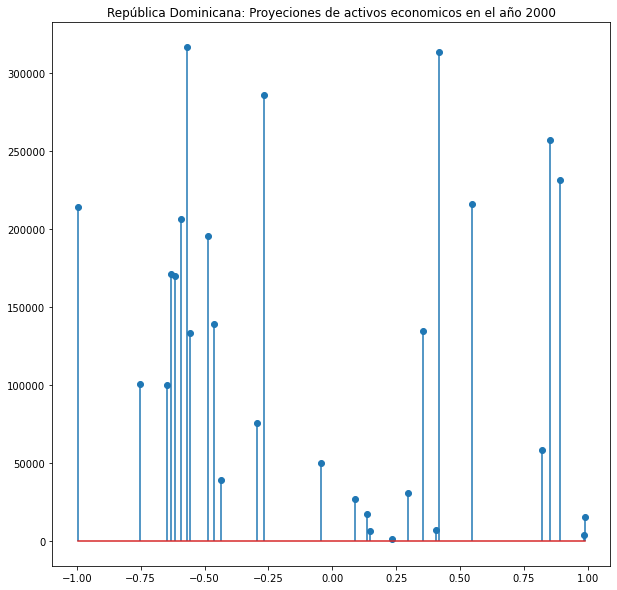

In [84]:
plt.figure(figsize=(10,10))
plt.title("República Dominicana: Proyeciones de activos economicos en el año 2000")
plt.stem(np.cos(datos2["2000"]),datos2["2000"], use_line_collection=True) 

###### Interpretación: 
Se muestran las distribuciones de frecuencia de los estimados economicamente activos en la población, durante el año 2000, para ello se utilizó un diagrama de tallos y hojas, y el eje x se preparó utilizando a numpy y calculando con esta librería el coseno, ya que fue la única manera viable. 

Text(0.5, 0, 'Activos economicamente')

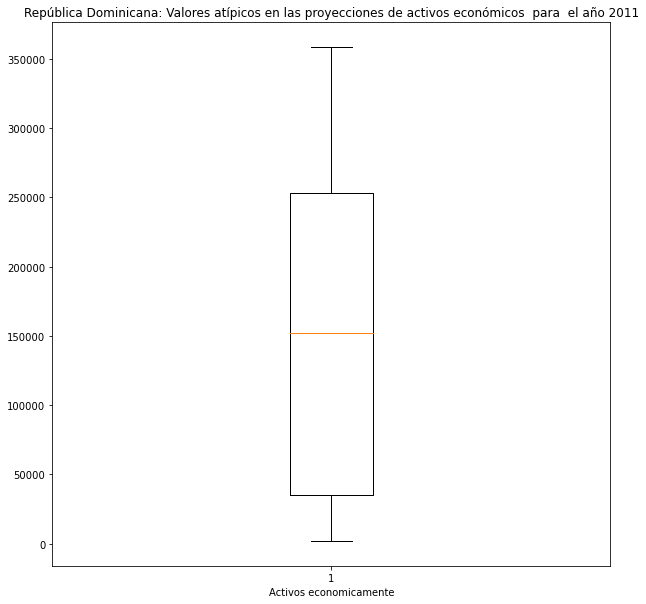

In [88]:
plt.figure(figsize=(10,10))
plt.title("República Dominicana: Valores atípicos en las proyecciones de activos económicos  para  el año 2011")
plt.boxplot(datos2["2011"])
plt.xlabel("Activos economicamente")

##### Interpretación: 
En el gráfico anterior se presentaron los valores atípicos en las proyecciones de activos económicos para el 2011, donde se denota que todas las poblaciones estimadas se acomodan a la media, y no hay valores que alteren a la media. 

Text(0.5, 1.0, 'República Dominicana: Distribución de las poyecciones de activos económicos o activos en el mercado laboral, para el año 2021.')

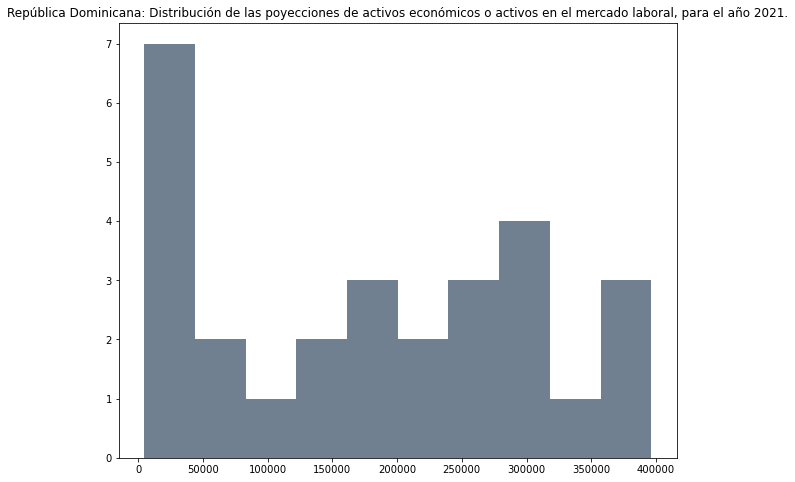

In [28]:
plt.figure(figsize=(10,8))
plt.hist(datos2["2021"], color="slategrey")
plt.title("República Dominicana: Distribución de las poyecciones de activos económicos o activos en el mercado laboral, para el año 2021.")

##### Interpetración:
En el gráfico  anterior se muestran en forma de rangos, la cantidad de activos en la economía para el 2021, donde el rango con mayoría es el que va desde 0 hasta 50,000 personas de la población domunicana. 

Text(0.5, 1.0, 'República Dominicana: Distribución de las proyecciones de activos laborales para el año 2009')

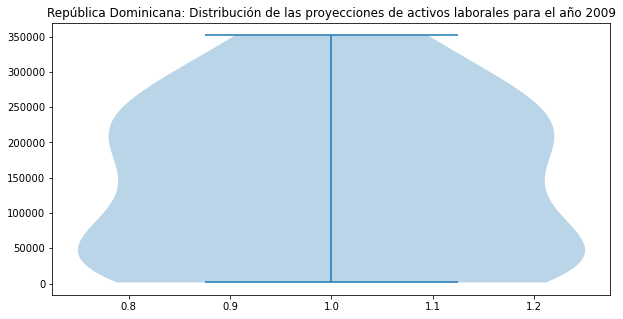

In [29]:
plt.figure(figsize=(10,5))
plt.violinplot(datos2["2009"])
plt.title("República Dominicana: Distribución de las proyecciones de activos laborales para el año 2009")

##### Interpretación:
La distribución de la población activa economicamente no es tan uniforme que digamos, donde se nota que es más densa para aquella que se estima entre 0 y 50,000 personas, y para entre 200,000 y 250,000 personas dominicanas. 

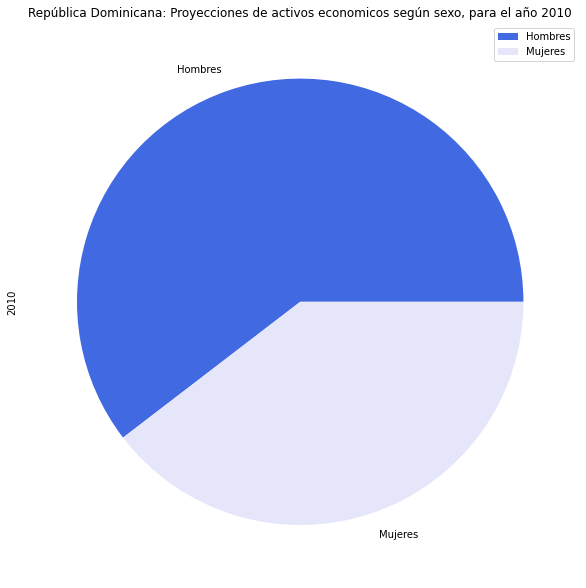

In [101]:

datos2.groupby(["sexo"]) ["2010"].sum().plot(kind="pie", colors=["royalblue", "lavender"])
labels1=["Hombres", "Mujeres"]
plt.legend(labels1)


###### Interpretación:
Para el año 2010, se proyecto, que la población más activa en la economía dominicana sería aquella de sexo masculino, las mujeres no ocupan un peso tan grande como los hombres, pero, si son bastantes activas en este ámbito de la sociedad. 

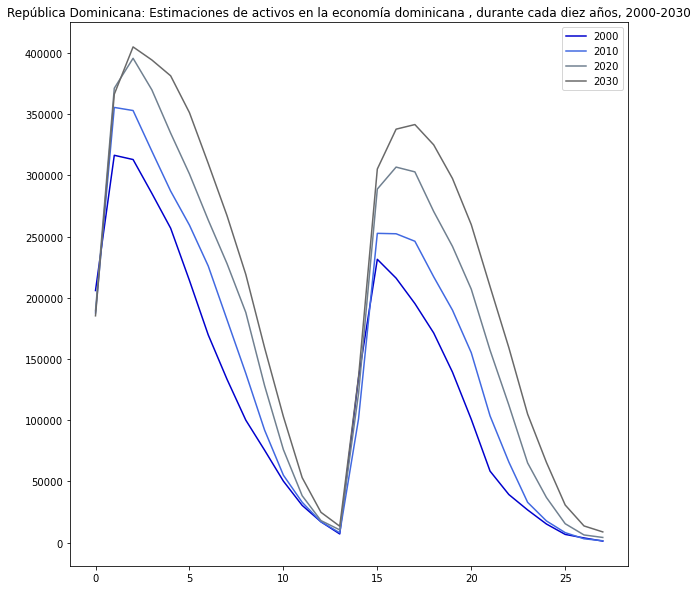

In [102]:
labels3=[2000,2010,2020,2030]
plt.figure(figsize=(10,10))
plt.plot(y,datos2["2000"], color="mediumblue")
plt.plot(y,datos2["2010"], color="royalblue")
plt.plot(y, datos2["2020"], color="slategrey")
plt.plot(y, datos2["2030"], color="dimgray")
plt.title("República Dominicana: Estimaciones de activos en la economía dominicana , durante cada diez años, 2000-2030")
plt.legend(labels3)

###### Interpretación:
Según el gráfico anterior las estimaciones de una población más activa en la economía dominicana es la proyectada para el año 2030, ya que, para 2000 esta es realmente baja, aunque todas siguen una distribución muy parecida, debido a la figura que toman todas las líneas que representan los años transcurridos en 2000, 2010,2020, y 2030.

<AxesSubplot:title={'center':'República Dominicana: Proyecciones de población activa en la economía durante cinco años, 2020-2025.'}>

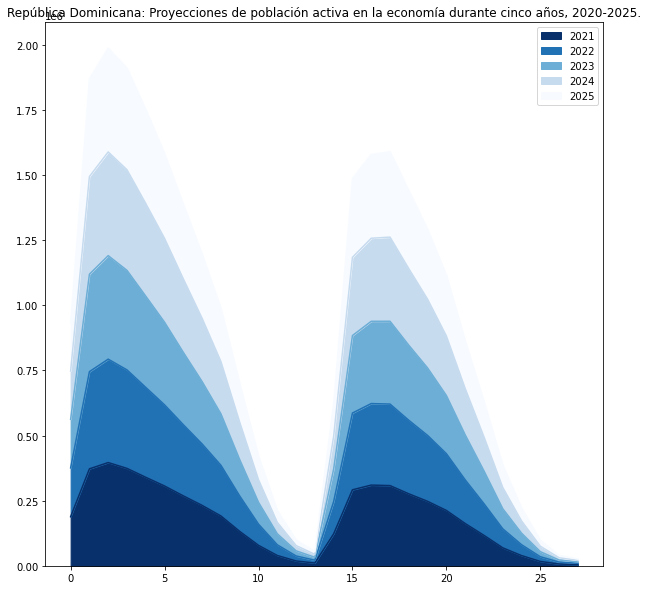

In [89]:

datos2.plot.area(y= ["2021","2022", "2023", "2024","2025"], colormap="Blues_r", figsize=(10,10), title="República Dominicana: Proyecciones de población activa en la economía durante cinco años, 2020-2025.")

###### Interpretación:
Finalmente, y utilizando un gráfico de áreas de la librería Pandas, vemos como se comporta la población activa en la economía entre el año 2021 hasta el 2025, según predicciones, donde la mayoría sigue llevandola el año 2025, contrario a el 2021, donde la población activa es realmente baja. 

### Hallazgo importante:
Auxiliandonos de los gráficos construidos en todo el análisis exploratorio, pudimos ver que la población activa en la economía dominicana va en crecimiento con el pasar de los años, lo cual es realmente alentador debido a que muestra que con ello, los ingresos del país irán en aumento y a la vez la calidad de vida, eso es si una buena administración sabe aprovechar dicho aumento, y si se estimulan las diferentes industrias, en favor de crear las vacantes que ocupará la población estimada. 


### Covarianza del  conjunto de datos:

In [60]:
#Array con la columna  de proyecciones del año  2005:
x=[10]
a2005=np.array(datos2["2005"])
print(a2005)
#Covarianza de dicho array
covarianza= np.cov(a2005)
print("La covarianza de las proyecciones del año 2005 es: ", covarianza)
#Matriz   de covarianza de todos los datos
matriz_datos2=datos2.cov()
print("La matriz de covarianza para todo el conjunto de datos de proyecciones es: ")
matriz_datos2

[199299 336870 333362 301396 272153 242525 198523 157301 116995  77951
  54682  32813  17878   8032 117298 242454 235043 220264 193354 167170
 125571  80021  50149  27633  16925   7626   3626   1452]
La covarianza de las proyecciones del año 2005 es:  11766374946.62963
La matriz de covarianza para todo el conjunto de datos de proyecciones es: 


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
2000,1.036814e+10,1.050299e+10,1.063154e+10,1.077098e+10,1.088789e+10,1.099251e+10,1.111035e+10,1.122252e+10,1.134203e+10,1.143912e+10,...,1.252095e+10,1.255815e+10,1.259632e+10,1.262633e+10,1.265189e+10,1.263511e+10,1.261643e+10,1.259560e+10,1.257300e+10,1.254871e+10
2001,1.050299e+10,1.064369e+10,1.077810e+10,1.092355e+10,1.104637e+10,1.115686e+10,1.128041e+10,1.139823e+10,1.152354e+10,1.162616e+10,...,1.275291e+10,1.279334e+10,1.283495e+10,1.286788e+10,1.289611e+10,1.288185e+10,1.286561e+10,1.284738e+10,1.282701e+10,1.280478e+10
2002,1.063154e+10,1.077810e+10,1.091834e+10,1.106980e+10,1.119855e+10,1.131494e+10,1.144418e+10,1.156767e+10,1.169878e+10,1.180696e+10,...,1.297879e+10,1.302250e+10,1.306761e+10,1.310351e+10,1.313447e+10,1.312285e+10,1.310917e+10,1.309368e+10,1.307565e+10,1.305559e+10
2003,1.077098e+10,1.092355e+10,1.106980e+10,1.122746e+10,1.136228e+10,1.148470e+10,1.161979e+10,1.174910e+10,1.188615e+10,1.200005e+10,...,1.321794e+10,1.326495e+10,1.331358e+10,1.335247e+10,1.338617e+10,1.337707e+10,1.336584e+10,1.335295e+10,1.333715e+10,1.331913e+10
2004,1.088789e+10,1.104637e+10,1.119855e+10,1.136228e+10,1.150319e+10,1.163171e+10,1.177260e+10,1.190770e+10,1.205067e+10,1.217030e+10,...,1.343531e+10,1.348585e+10,1.353824e+10,1.358032e+10,1.361695e+10,1.361087e+10,1.360256e+10,1.359281e+10,1.357969e+10,1.356417e+10
2005,1.099251e+10,1.115686e+10,1.131494e+10,1.148470e+10,1.163171e+10,1.176637e+10,1.191306e+10,1.205395e+10,1.220281e+10,1.232821e+10,...,1.364073e+10,1.369492e+10,1.375119e+10,1.379657e+10,1.383623e+10,1.383341e+10,1.382828e+10,1.382192e+10,1.381174e+10,1.379895e+10
2006,1.111035e+10,1.128041e+10,1.144418e+10,1.161979e+10,1.177260e+10,1.191306e+10,1.206585e+10,1.221285e+10,1.236798e+10,1.249943e+10,...,1.386284e+10,1.392070e+10,1.398078e+10,1.402958e+10,1.407246e+10,1.407243e+10,1.407000e+10,1.406652e+10,1.405877e+10,1.404820e+10
2007,1.122252e+10,1.139823e+10,1.156767e+10,1.174910e+10,1.190770e+10,1.205395e+10,1.221285e+10,1.236597e+10,1.252735e+10,1.266488e+10,...,1.407930e+10,1.414087e+10,1.420479e+10,1.425704e+10,1.430317e+10,1.430600e+10,1.430633e+10,1.430581e+10,1.430057e+10,1.429228e+10
2008,1.134203e+10,1.152354e+10,1.169878e+10,1.188615e+10,1.205067e+10,1.220281e+10,1.236798e+10,1.252735e+10,1.269517e+10,1.283889e+10,...,1.430585e+10,1.437113e+10,1.443889e+10,1.449459e+10,1.454397e+10,1.454968e+10,1.455281e+10,1.455528e+10,1.455256e+10,1.454658e+10
2009,1.143912e+10,1.162616e+10,1.180696e+10,1.200005e+10,1.217030e+10,1.232821e+10,1.249943e+10,1.266488e+10,1.283889e+10,1.298874e+10,...,1.450656e+10,1.457563e+10,1.464730e+10,1.470653e+10,1.475923e+10,1.476797e+10,1.477402e+10,1.477962e+10,1.477954e+10,1.477598e+10


In [91]:
### Relación entre el año 2020 y el 2026:
matriz_datos2.loc["2020", "2026"]

16920810367.06614

#### Interpretación:
Para la matriz de covarianza que se construyó con ayuda de Numpy, vemos que todos los años tienen una relación realmente positiva, lo cual quiere decir que todas las variables dependenden la una de la otra, lo mismo que se refleja cuando usamos esta medida para verificar el tipo de relación existente entre las proyecciones del año 2020, y las del año 2026.